# <center>Assessment CLO-3: Tugas Pemrograman Learning</center>

<b>Topik</b>
Klasifikasi pada Auction Verification menggunakan KNN

<b>Kelompok: </b>

Anggota:
1. M Afif Zain - 103012380548
2. Devana Gema Falesta - 103012380513
3. Niesya Yulianny - 103012380523

Kelas :
IF-46-04

#### Pendahuluan
Sumber Dataset : https://archive.ics.uci.edu/dataset/713/auction+verification

Dataset tersebut berisi berbagai atribut dan hasil verifikasi yang terkait dengan sistem verifikasi lelang. Dataset ini  digunakan untuk menganalisis dan memprediksi hasil verifikasi lelang berdasarkan berbagai atribut seperti harga properti, kategori produk, pemenang, kapasitas proses, dan waktu verifikasi.

* process.b1.capacity hingga process.b4.capacity: Atribut ini kemungkinan
mewakili kapasitas atau kemampuan dari proses atau komponen yang berbeda (b1 hingga b4) dalam sistem lelang.
* property.price: Harga properti yang dilelang.
* property.product: Jenis atau kategori produk yang dilelang, diwakili oleh nilai numerik (1 hingga 6).
* property.winner: Pemenang lelang, diwakili oleh nilai numerik (0 hingga 4).
* verification.result: Hasil dari proses verifikasi lelang, ditunjukkan sebagai True atau False.
* verification.time: Waktu yang dibutuhkan untuk proses verifikasi, diukur dalam satuan tertentu (kemungkinan detik atau milidetik).

In [ ]:
# Show your data in tabular or other visualization ways
# Data Preprocessing
# Data Splitting
# Write your code here

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


##Load Data

In [ ]:
data = pd.read_csv('data.csv')

data.head()

,process.b1.capacity,process.b2.capacity,process.b3.capacity,process.b4.capacity,property.price,property.product,property.winner,verification.result,verification.time
0,0,0,2,1,59,1,0,False,163.316667
1,0,0,2,1,59,2,0,False,200.860000
2,0,0,2,1,59,4,0,False,154.888889
3,0,0,2,1,59,6,0,False,108.640000
4,0,0,2,1,60,1,0,True,85.466667


##Data Preprocessing
Pada bagian ini terdapat 2 data preprocessing, yaitu Split Dataset dan Normalisasi data
1. Pembagian dataset menjadi training dan test set penting untuk memastikan efektivitas dan akurasi model machine learning.

* Training set digunakan untuk melatih algoritma
* test set untuk menguji keakuratan model pada data baru setelah selesai dilatih.

Pembagian ini mencegah overfitting, membantu memilih model terbaik, dan memberikan estimasi performa yang realistis pada data baru.

2. Normalisasi data penting dilakukan untuk menghindari fitur dengan skala berbeda mendominasi perhitungan, mempercepat konvergensi algoritma, dan memudahkan interpretasi bobot atau koefisien dalam model. Pada dataset Auction Verification, fitur-fitur memiliki skala nilai yang bervariasi, sehingga normalisasi membuat semua fitur berada dalam rentang nilai yang sama, membantu performa algoritma KNN

##Splitting Data

Pada code ini akan displit data menjadi 3 pembagian untuk uji coba, untuk pembagian training dan testing yaitu 90:10, 80:20, 70:30. Setelah dilakukan splitting data, data akan dinormalisasikan. Normalisasi data bertujuan untuk menyeragamkan skala atau rentang nilai dari fitur-fitur dalam dataset, sehingga dapat meningkatkan performa dan akurasi dari model.

In [ ]:
# Menentukan fitur dan variabel target
x = data.drop('verification.result', axis=1)
y = data['verification.result']

# Split dataset menjadi training dan testing
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42) # data split 90:10
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # data split 80:20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42) # data split 70:30

# Normalisasi data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

##Model Training

Dalam pembuatan model K-Nearest Neighbors (KNN), digunakan parameter K dengan nilai 5. Parameter K menentukan jumlah tetangga terdekat yang dipertimbangkan dalam klasifikasi. Jika nilai K ditingkatkan, model akan mempertimbangkan lebih banyak tetangga dalam pengambilan keputusan, yang dapat menghasilkan batas keputusan yang lebih halus dan mengurangi pengaruh outlier, namun dapat juga meningkatkan kompleksitas komputasi. Di sisi lain, jika nilai K dikurangi, model akan lebih fokus pada tetangga terdekat dan menghasilkan batas keputusan yang lebih ketat, tetapi lebih rentan terhadap noise dan outlier dalam data

In [ ]:
# Inisialisasi model KKN
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(x_train, y_train)


KNeighborsClassifier()

##Save Model

In [ ]:
# Menyimpan model
joblib.dump(knn, 'trained_model.pkl')


['trained_model.pkl']

##Testing Performa

In [ ]:
# Melakukan testing
y_train_pred = knn.predict(x_train)
y_pred = knn.predict(x_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nTraining Accuracy: {:0.2f}".format(accuracy_score(y_train, y_train_pred)))
print("\nTesting Accuracy: {:0.2f}".format(accuracy_score(y_test, y_pred)))


Confusion Matrix:
[[524  10]
 [ 55  24]]

Classification Report:
              precision    recall  f1-score   support

       False       0.91      0.98      0.94       534
        True       0.71      0.30      0.42        79

    accuracy                           0.89       613
   macro avg       0.81      0.64      0.68       613
weighted avg       0.88      0.89      0.87       613


Training Accuracy: 0.92

Testing Accuracy: 0.89


##Visualisasi Performa

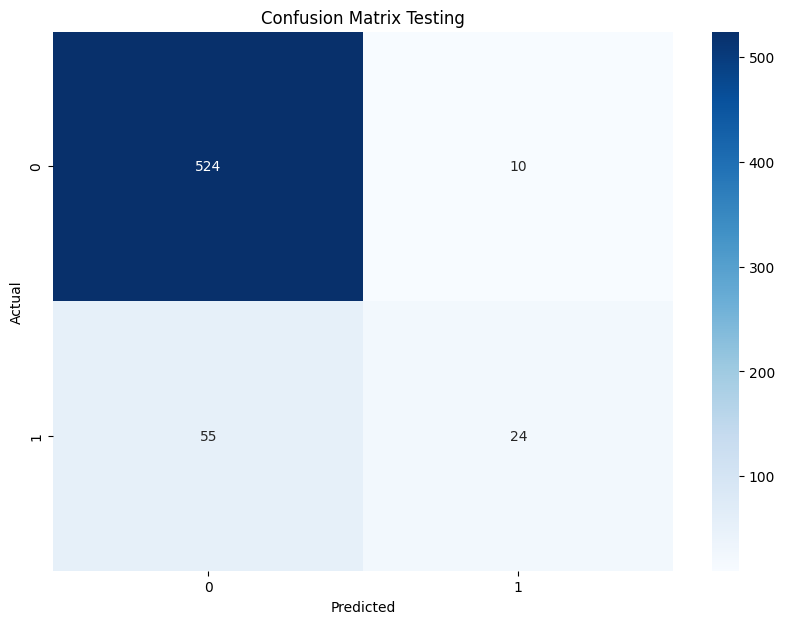

In [ ]:
# Confusion Matrix testing
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Testing')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

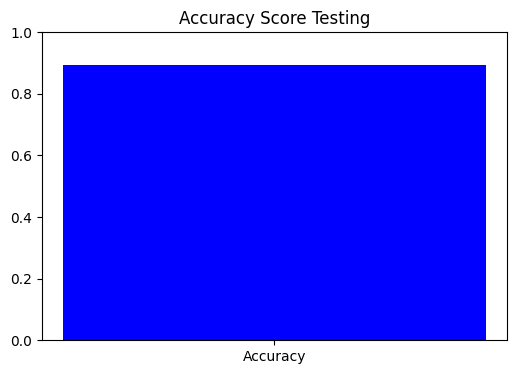

In [ ]:
# Akurasi skor testing
accuracy = accuracy_score(y_test, y_pred)
plt.figure(figsize=(6, 4))
plt.bar(['Accuracy'], [accuracy], color='blue')
plt.ylim(0, 1)
plt.title('Accuracy Score Testing')
plt.show()

#### Hasil dan Analisis
Model K-Nearest Neighbors (KNN) telah dilatih menggunakan dataset yang ada untuk memprediksi hasil verifikasi(verification.result). Evaluasi model dilakukan dengan memanfaatkan confusion matrix, laporan klasifikasi (Presisi , Recall, F1-Skor), dan skor akurasi. Visualisasi kinerja model disajikan melalui heatmap confusion matrix dan plot skor akurasi.

*   Skor akurasi menggambarkan performa keakuratan model pada data pengujian
*   Presisi menggambarkan proporsi prediksi positif yang benar-benar positif.
*   Recall menggambarkan proporsi total kasus positif yang berhasil diidentifikasi dengan benar oleh model.
*   F1-Skor adalah rata-rata harmonik dari presisi dan recall, yang memberikan keseimbangan antara keduanya.

Hasil Pengujian :

1. Pengujian 1 dilakukan dengan pembagian dataset 90  : 10 , dan didapatkanlah hasil metriks evaluasi sebagai berikut :
Accuracy : 89%  
Recall : 31%
Precision : 75%
F1-Score : 44%

2. Pengujian 2 dilakukan dengan pembagian dataset 80 : 20 , dan didapatkanlah hasil metriks evaluasi sebagai berikut :
Accuracy : 90%
Recall : 35%
Precision : 76%
F1-Score : 47%

3. Pengujian 3 dilakukan dengan pembagian dataset 70 : 30 , dan didapatkanlah hasil metriks evaluasi sebagai berikut :
Accuracy : 89%
Recall : 30%
Precision : 71%
F1-Score : 42%

#### Kesimpulan
Model K-Nearest Neighbors (KNN) telah berhasil dilatih dan diuji menggunakan dataset Auction Verification yang diberikan. Setelah melakukan eksperimen dengan beberapa rasio pembagian dataset, ditemukan bahwa rasio terbaik adalah 80:20 (80% data untuk pelatihan dan 20% untuk pengujian). Dengan rasio ini, model KNN mencapai skor akurasi sebesar 90%, lebih tinggi dibandingkan dengan rasio pembagian dataset lainnya yang diujikan.Hasil ini menunjukkan bahwa model KNN memiliki performa yang baik dan efektif untuk klasifikasi pada dataset Auction Verification. Skor akurasi yang tinggi mengindikasikan bahwa model dapat memprediksi kelas dengan tepat untuk sebagian besar data yang diujikan.